# **Problem Statement**
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.

The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# **Hypothesis Generation**

# **Loading Packages and Data**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns #Understanding my variables
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('/content/Train.csv')
test_data = pd.read_csv('/content/Test.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## **Missing Value Treatment**

In [5]:
def fill_null_values(data):
  data['Item_Weight'].fillna(data.Item_Weight.mean(),inplace=True)
  data['Outlet_Size'].fillna(data.Outlet_Size.mode()[0],inplace=True)

fill_null_values(train_data)
fill_null_values(test_data)

# **Feature Engineering**

In [6]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(['low fat'], 'Low Fat')
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(['LF'], 'Low Fat')
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(['reg'], 'Regular')

test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(['low fat'], 'Low Fat')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(['LF'], 'Low Fat')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(['reg'], 'Regular')

In [7]:
train_data["No_of_years"] = 2013 - train_data["Outlet_Establishment_Year"]
test_data["No_of_years"] = 2013 - test_data["Outlet_Establishment_Year"]

train_data.drop("Outlet_Establishment_Year", axis=1, inplace=True)
test_data.drop("Outlet_Establishment_Year", axis=1, inplace=True)


# **Univariate Analysis**

In [8]:
from pandas_profiling import ProfileReport

In [9]:
profile = ProfileReport(train_data, 'Pandas Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

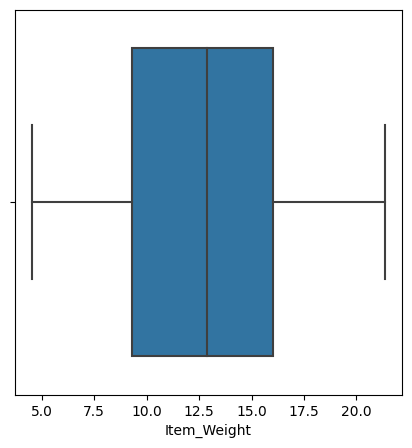

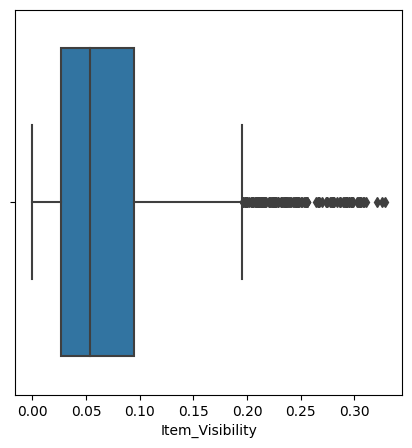

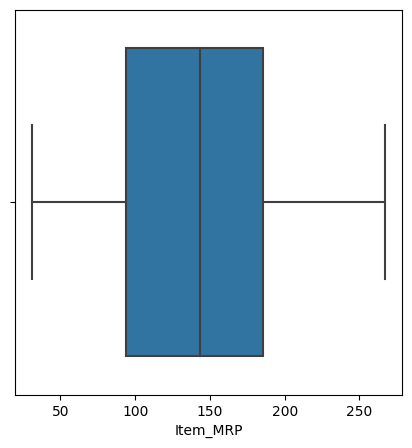

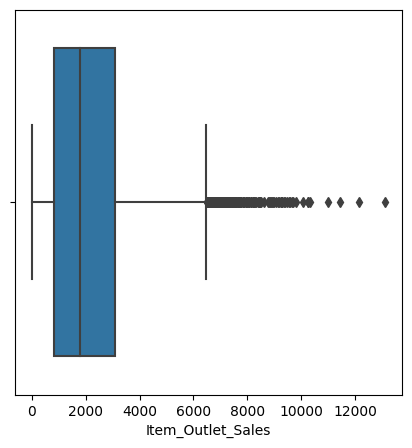

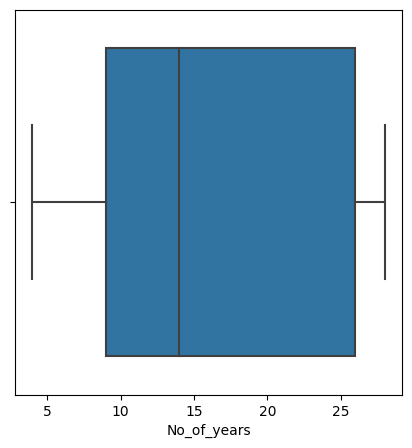

In [10]:
numeric_cols = train_data.select_dtypes(include=['int', 'float']).columns

for col in numeric_cols:
    fig, axs = plt.subplots(1,1,figsize=(5,5))
    sns.boxplot(x = train_data[col])

In [11]:
def find_boundry(df,variable):
    Q1 =df[variable].quantile(.25)
    Q3 =df[variable].quantile(.75)
    IQR = Q3 - Q1
    lower_boundry = Q1 - 1.5*IQR
    upper_boundry = Q3 + 1.5*IQR
    
    return lower_boundry ,upper_boundry
def treat_outliers(df,variable):
    lower_boundry ,upper_boundry = find_boundry(df,variable)
    df[variable] = np.where(df[variable] > upper_boundry, upper_boundry, df[variable])
    df[variable] = np.where(df[variable] < lower_boundry, lower_boundry, df[variable])

treat_outliers(train_data, 'Item_Visibility')
treat_outliers(train_data, 'Item_Outlet_Sales')

# **Bivariate Analysis**

<Axes: >

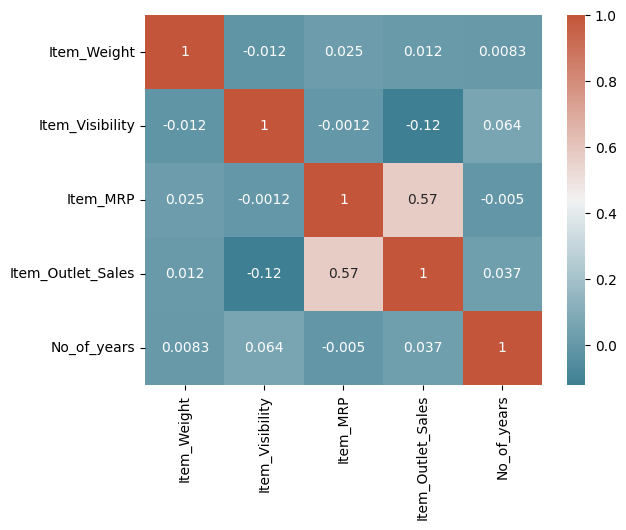

In [12]:
corr = train_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# **Encoding Categorical Variables**

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_cols = train_data.select_dtypes(include=['object']).columns

train_data[categorical_cols]= train_data[categorical_cols].apply(le.fit_transform)
test_data[categorical_cols]= test_data[categorical_cols].apply(le.fit_transform)

## **`PreProcessing Data`**

In [14]:
features = train_data.drop(['Item_Outlet_Sales'],axis=1)
target = train_data['Item_Outlet_Sales']

In [15]:
data_x, holdout_x, data_y, holdout_y = train_test_split(features, target, test_size=0.2, random_state=121)

# Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

lr_model.fit(data_x, data_y)

LinearRegression()

In [17]:
lr_preds = lr_model.predict(holdout_x)
lr_preds

array([2190.43113784, 2984.46107433, 1287.2076138 , ..., 2579.60040243,
       2979.35098314, 2346.3092689 ])

In [18]:
lr_model.score(holdout_x, holdout_y)

0.5114401051830408

# Regularized Linear Regression

In [19]:
from sklearn.linear_model import Lasso
l_model = Lasso()

l_model.fit(data_x, data_y)

Lasso()

In [20]:
l_preds = l_model.predict(holdout_x)
l_preds

array([2214.28052716, 3016.35748039, 1280.28851503, ..., 2599.70762861,
       2968.04667   , 2339.47688352])

In [21]:
l_model.score(holdout_x, holdout_y)

0.5110209741346885

# RandomForest

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth=5, min_samples_split=10)
rf_model.fit(data_x, data_y)

RandomForestRegressor(max_depth=5, min_samples_split=10)

In [23]:
rf_preds = rf_model.predict(holdout_x)

In [24]:
rf_model.score(holdout_x, holdout_y)

0.5972456909895879

# XGBoost

In [25]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=10, n_estimators=150)
xgb_model.fit(data_x, data_y)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [26]:
xgb_preds = xgb_model.predict(holdout_x)

In [27]:
xgb_model.score(holdout_x, holdout_y)

0.585140672659486

In [28]:
# As Random Forest Gives max score we use it for test prediction

preds = rf_model.predict(test_data)

In [29]:
test_data["Item_Outlet_Sales"] = preds

In [30]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,No_of_years,Item_Outlet_Sales
0,1103,20.750000,0,0.007565,13,107.8622,9,1,0,1,14,1667.527389
1,1067,8.300000,1,0.038428,4,87.3198,2,1,1,1,6,1428.490948
2,1406,14.600000,0,0.099575,11,241.7538,0,1,2,0,15,611.278104
3,809,7.315000,0,0.015388,13,155.0340,2,1,1,1,6,2516.718711
4,1184,12.695633,1,0.118599,4,234.2300,5,1,2,3,28,5431.510536
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,1,0.013496,13,141.3154,8,2,0,1,16,2000.697888
5677,306,7.600000,1,0.142991,15,169.1448,3,1,2,2,4,2709.644250
5678,1412,10.000000,0,0.073529,8,118.7440,7,1,1,1,11,1897.762072
5679,517,15.300000,1,0.000000,3,214.6218,2,1,1,1,6,3717.926627


# **Conclusion**

- Low Fat Content goods sell more in both Tier 1 and Tier 3 cities, demonstrating that diet consciousness is not limited to metropolitan regions.

- Items with increased visibility do not have better sales or cheaper MRPs; rather, visibility is dispersed evenly.

- Snack foods and fruits and vegetables are the most popular items in each store, regardless of location.

- The older Medium-sized stores outperformed the others in terms of sales.

- Although Supermarket Type-1 has a greater size, which corresponds to more sales, this does not imply that well-performing grocery stores are inferior to it, as they do well with lower sizes as well.

- Supermarket Type-3 has the best sales performance, followed by rural grocery stores.